In [ ]:
import pandas as pd
import pylab
import numpy as np
import sklearn
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc


In [ ]:
#This cell reads our data from the csv file and stores it in a variable named data

columns = ["age", "job", "marital", "education", "default", "balances",
        "housing", "loan", "contact", "day", "month", "duration",
        "campaign", "pdays", "previous", "poutcome", "y"]

train_csv = 'bank-full.csv'
data = pd.read_csv(train_csv, sep=';')

In [ ]:
#This cell first shows each column's attribute and how many values there are total, then below we see a total count for each attribute of how many missing values there are for each
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


Describe Data for age:

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64


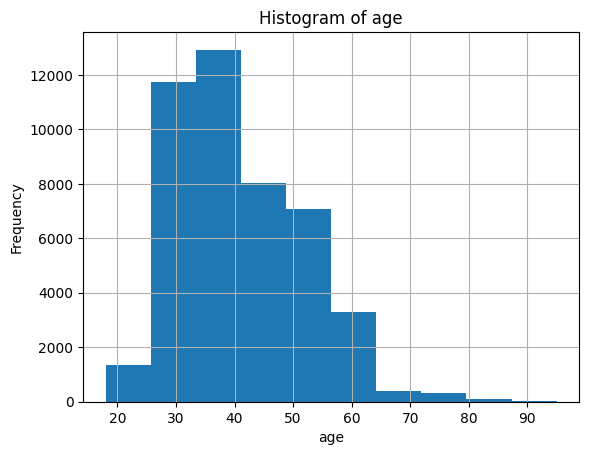


Value counts for job:

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64


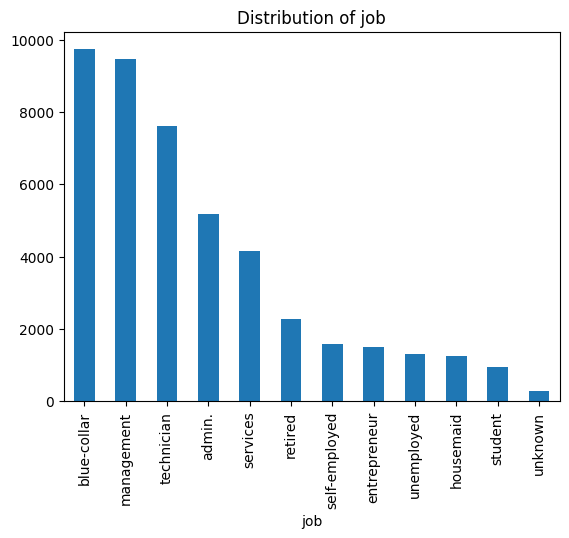


Value counts for marital:

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64


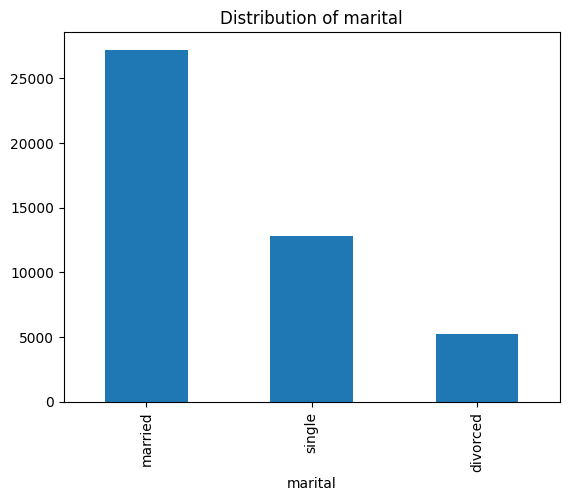


Value counts for education:

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64


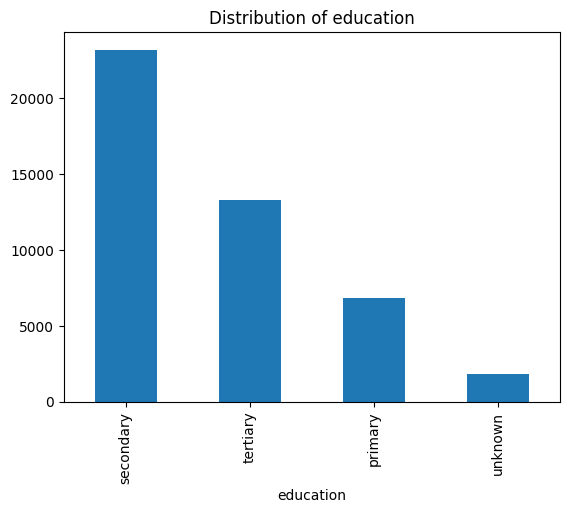


Value counts for default:

default
no     44396
yes      815
Name: count, dtype: int64


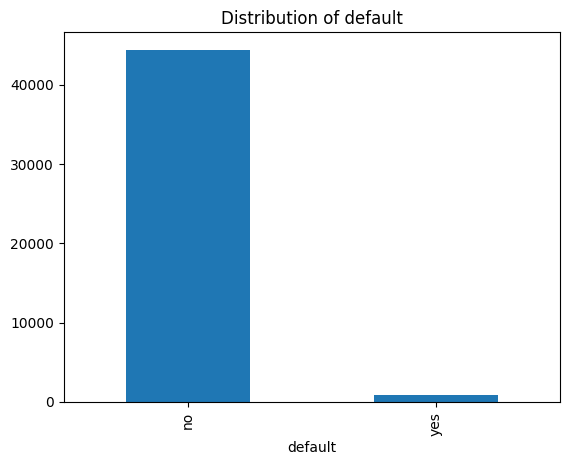


Describe Data for balance:

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64


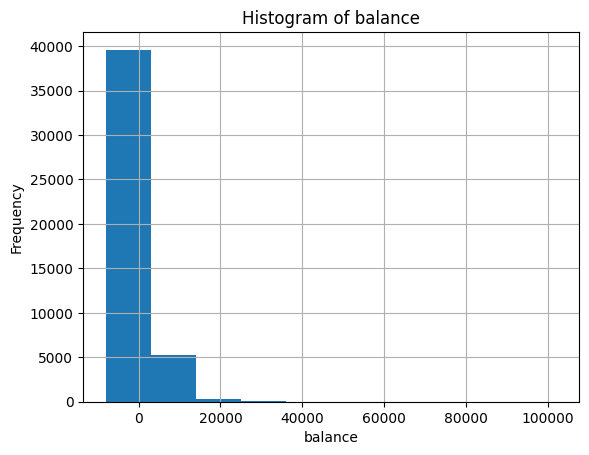


Value counts for housing:

housing
yes    25130
no     20081
Name: count, dtype: int64


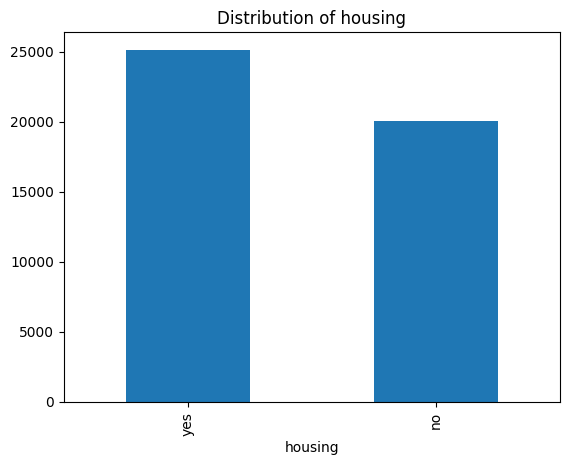


Value counts for loan:

loan
no     37967
yes     7244
Name: count, dtype: int64


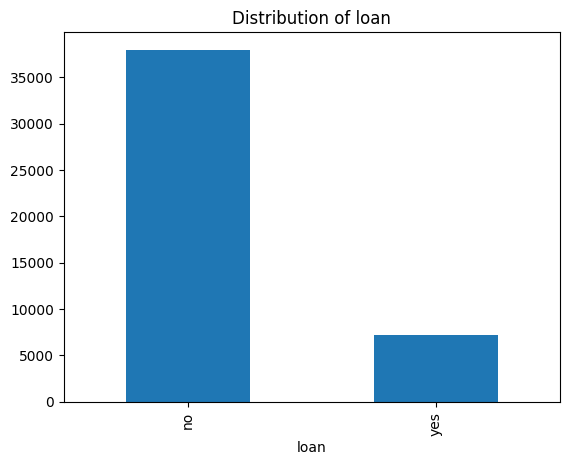


Value counts for contact:

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64


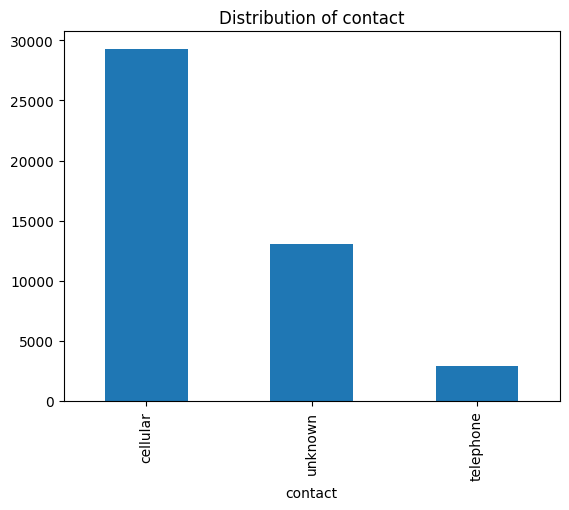


Describe Data for day:

count    45211.000000
mean        15.806419
std          8.322476
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64


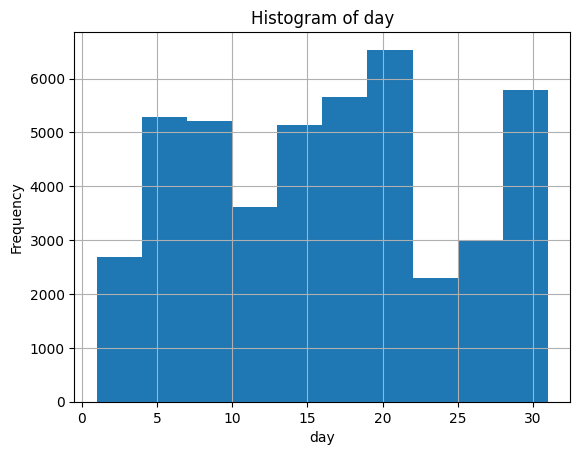


Value counts for month:

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64


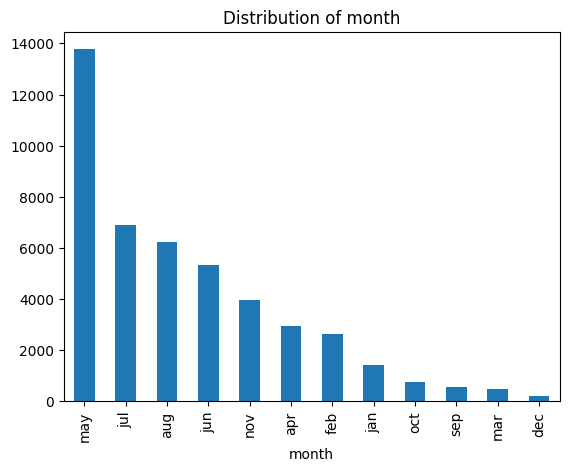


Describe Data for duration:

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64


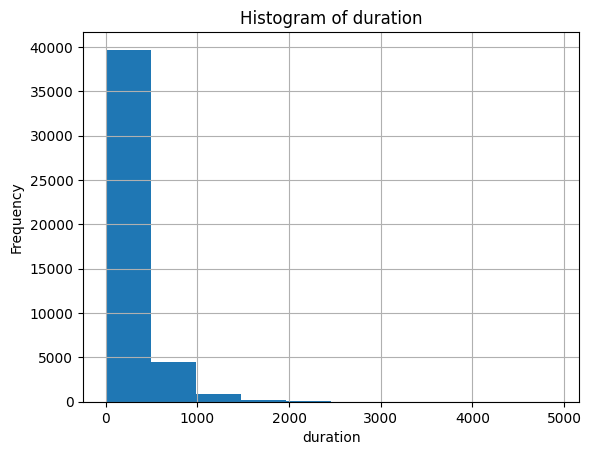


Describe Data for campaign:

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64


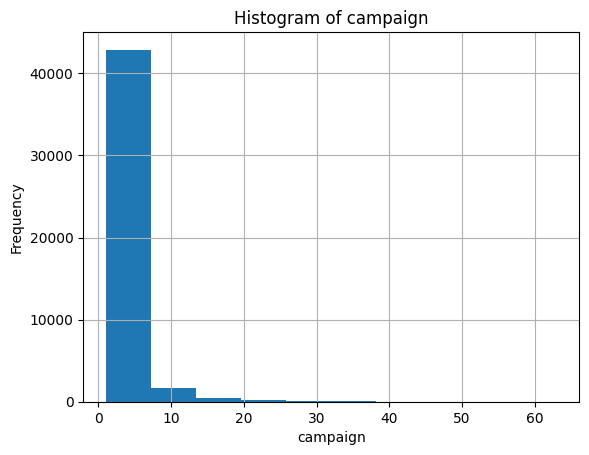


Describe Data for pdays:

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64


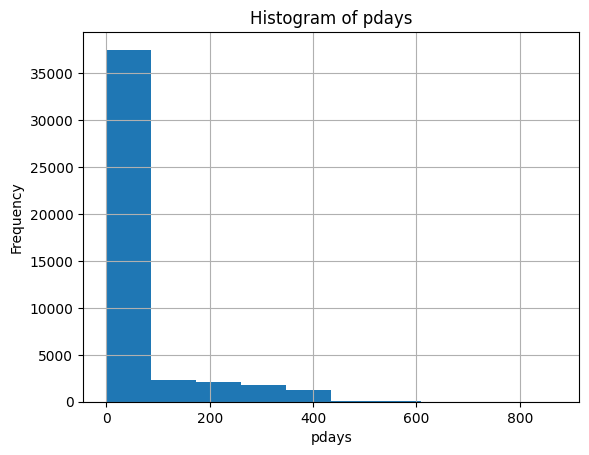


Describe Data for previous:

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64


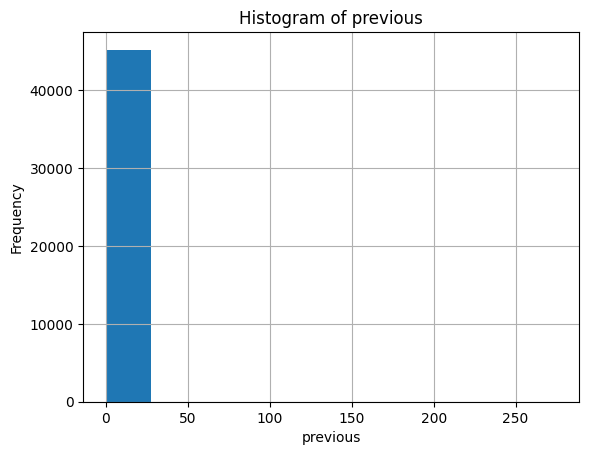


Value counts for poutcome:

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64


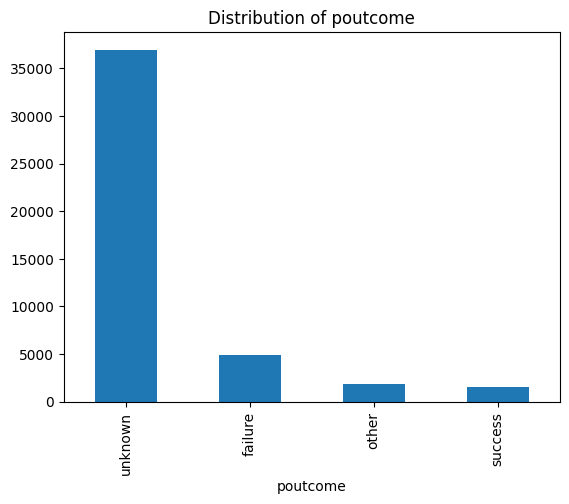


Value counts for y:

y
no     39922
yes     5289
Name: count, dtype: int64


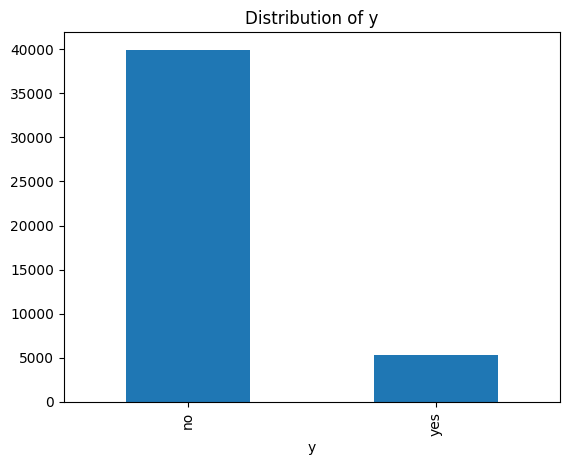

In [ ]:
'''
This cell shows the data distribution across each column
First, we check each column and decide if the data is an int or object
If data is an object, we output the value counts for the data in that column, accompanied by a bar chart showing the visual representation of the data
If data is an int, we output the data in that column using the describe() function. We also show this data with a histogram as well
'''
for column in data.columns:
    if data[column].dtype == 'object':
        print(f"\nValue counts for {column}:\n")
        print(data[column].value_counts())
        data[column].value_counts().plot(kind='bar')
        plt.title(f'Distribution of {column}')
        plt.show()
    else:
        print(f"\nDescribe Data for {column}:\n")
        print(data[column].describe())
        data[column].hist()
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

In [ ]:
"""
This cell shows a numerical correlation coefficient between predictors and target variable Y
During data_copy process, columns ('y_num', 'y_yes', 'y_binary', 'y_no') were created. Can ultimately disregard as they do not show the correlation
"""
print("Correlation between Predictors and Target Variable Y")
print("Numerical Representation\n")
print("Disregard Predictors: 'y_binary' and 'y_num'")

data_copy = data.copy()
data_copy['y_num'] = data_copy['y'].map({'no': 0, 'yes': 1})
data_encoded = pd.get_dummies(data_copy)

corr_matrix = data_encoded.corr() #create correlation matrix

#correlation of all predictors with the target variable ('y_num', originally known as "y")
target_corr = corr_matrix['y_num'].sort_values(ascending=False)
print(target_corr)

Correlation between Predictors and Target Variable Y
Numerical Representation

Disregard Predictors: 'y_binary' and 'y_num'
y_num                  1.000000
y_yes                  1.000000
duration               0.394521
poutcome_success       0.306788
housing_no             0.139173
contact_cellular       0.135873
month_mar              0.129456
month_oct              0.128531
month_sep              0.123185
pdays                  0.103621
previous               0.093236
job_retired            0.079245
job_student            0.076897
month_dec              0.075164
loan_no                0.068185
education_tertiary     0.066448
month_apr              0.065392
marital_single         0.063526
balance                0.052838
month_feb              0.038417
job_management         0.032919
poutcome_other         0.031955
age                    0.025155
default_no             0.022419
job_unemployed         0.020390
contact_telephone      0.014042
education_unknown      0.012053
poutcome_fai

"\n# Step 1: Make a clean copy\n\n\n# Step 2: Add numeric target column\ndata_copy['y_num'] = data_copy['y'].map({'no': 0, 'yes': 1})\n\n# Step 3: One-hot encode all categorical variables\ndata_encoded = pd.get_dummies(data_copy)\n\n# Step 4: Calculate correlation matrix\ncorr_matrix = data_encoded.corr()\n\n# Step 5: Display correlation between predictors and target (excluding y_num itself)\ntarget_corr = corr_matrix['y_num'].drop(['y_num', 'y_yes', 'y_no'], errors='ignore')\nprint(target_corr.sort_values(ascending=False))\n"

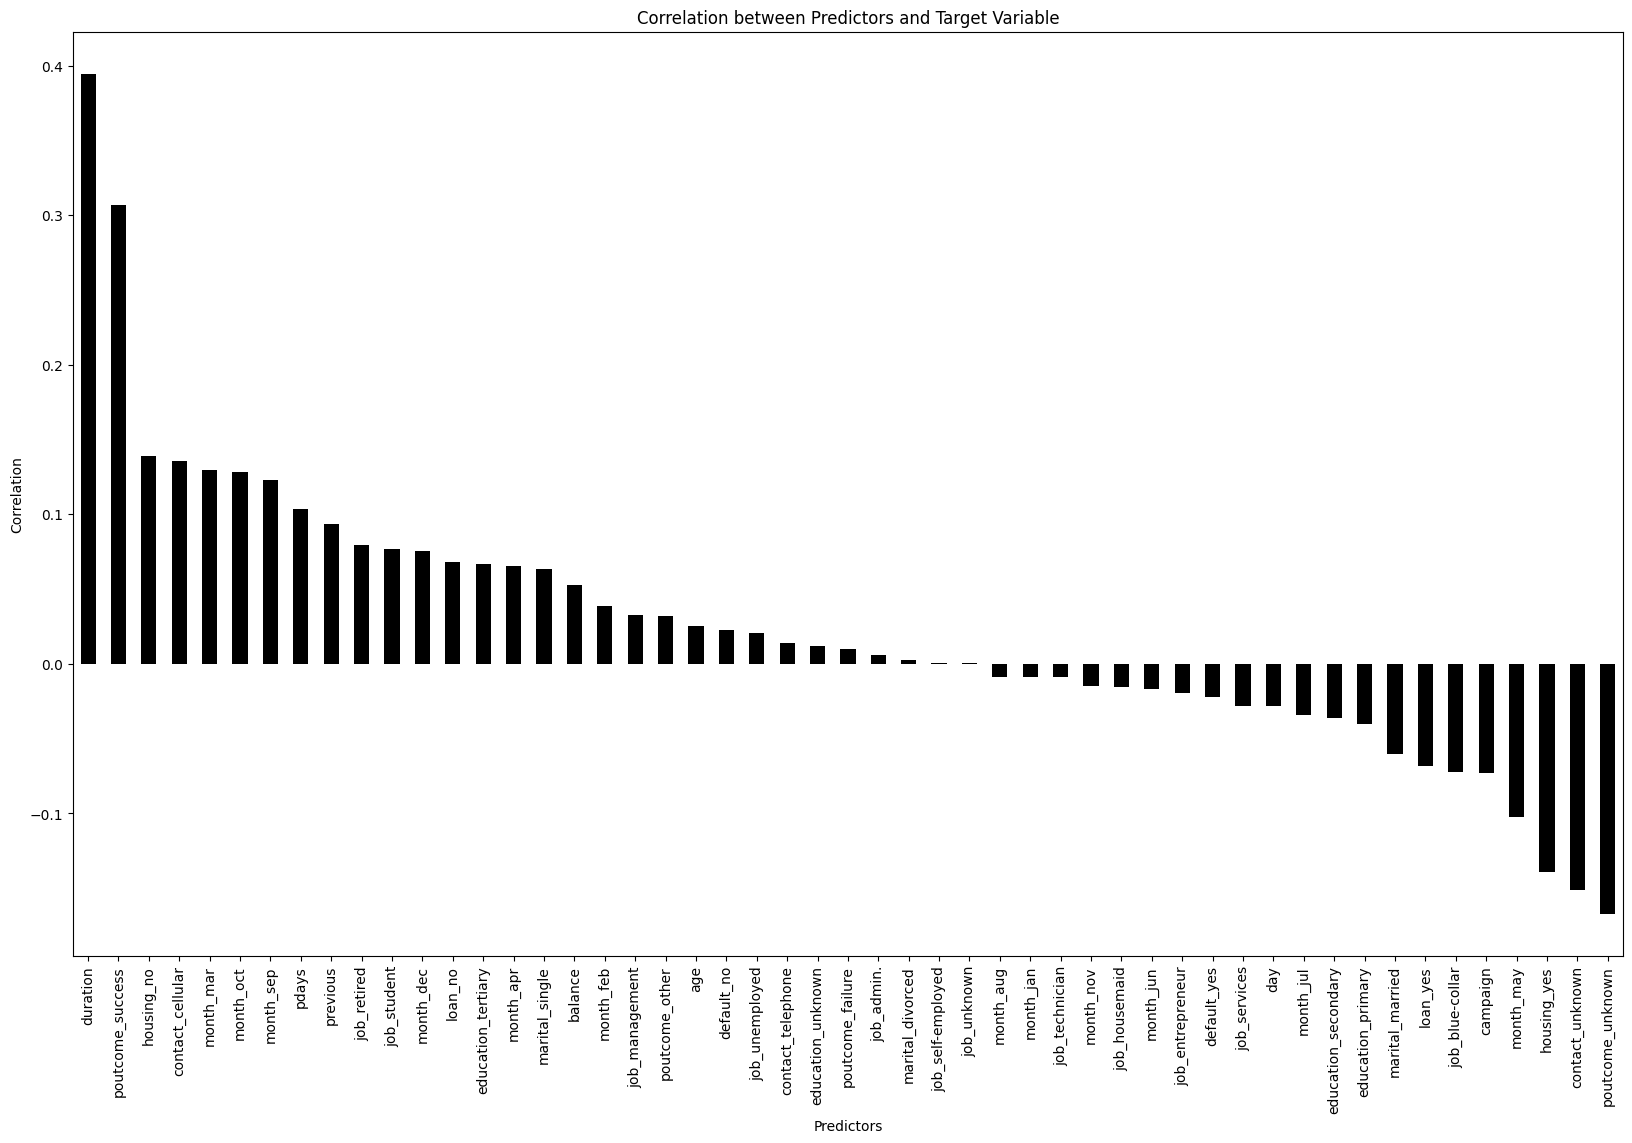

In [ ]:
"""
This cell shows a visual correlation between predictors and target variable Y
Can refer to numerical representation cell of these correlations to see the accurate coefficient
"""
plt.figure(figsize=(20, 12))

#drop 'y_num', 'y_yes', 'y_binary', and 'y_no' from the plot
columns_to_drop = ['y_num', 'y_yes', 'y_no']
target_corr.drop(columns_to_drop).plot(kind='bar', color='black')

plt.title('Correlation between Predictors and Target Variable')
plt.xlabel('Predictors')
plt.ylabel('Correlation')
plt.show()

In [ ]:
'''
Load and preprocess the dataset, very similar to how handled in ICA1
'''
url = train_csv
data = pd.read_csv(train_csv, sep=';')

label_encoder = LabelEncoder()
data['y'] = label_encoder.fit_transform(data['y'])

categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    if column != 'y':  # Skip the target column
        data[column] = label_encoder.fit_transform(data[column])

# Split data into features (X) and target (y)
X = data.drop('y', axis=1)
y = data['y']


In [ ]:
# Decision Tree Classifier with 10-fold cross-validation
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_cv_scores = cross_val_score(dt_model, X, y, cv=10, scoring='accuracy')
print("Decision Tree 10-Fold Cross-Validation Accuracy:", dt_cv_scores.mean())

Decision Tree 10-Fold Cross-Validation Accuracy: 0.8106859766223395


In [ ]:
# Random Forest Classifier with 10-fold cross-validation
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cv_scores = cross_val_score(rf_model, X, y, cv=10, scoring='accuracy')
print("Random Forest 10-Fold Cross-Validation Accuracy:", rf_cv_scores.mean())

Random Forest 10-Fold Cross-Validation Accuracy: 0.7596132540258097


Decision Tree Metrics:
Precision: 0.18, Recall: 0.18, F-Score: 0.18, AUC: 0.66


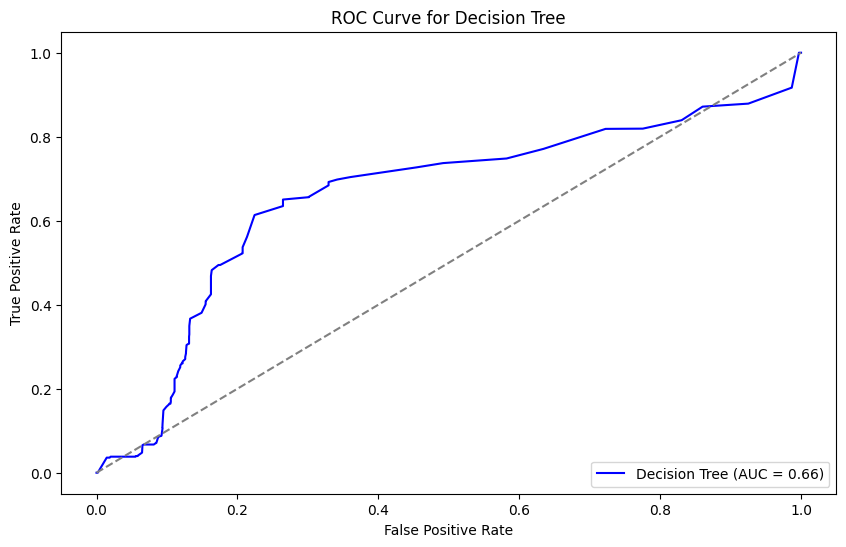

In [ ]:
# Cross-validated predictions for ROC curve and metrics
dt_predictions = cross_val_predict(dt_model, X, y, cv=10)
dt_probs = cross_val_predict(dt_model, X, y, cv=10, method='predict_proba')[:, 1]

dt_precision = precision_score(y, dt_predictions)
dt_recall = recall_score(y, dt_predictions)
dt_f1 = f1_score(y, dt_predictions)
dt_auc = roc_auc_score(y, dt_probs)

# ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y, dt_probs)

# Print the metrics
print("Decision Tree Metrics:")
print(f"Precision: {dt_precision:.2f}, Recall: {dt_recall:.2f}, F-Score: {dt_f1:.2f}, AUC: {dt_auc:.2f}")

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, color='blue', label=f'Decision Tree (AUC = {dt_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc='lower right')
plt.show()

Random Forest Metrics:
Precision: 0.15, Recall: 0.22, F-Score: 0.17, AUC: 0.59


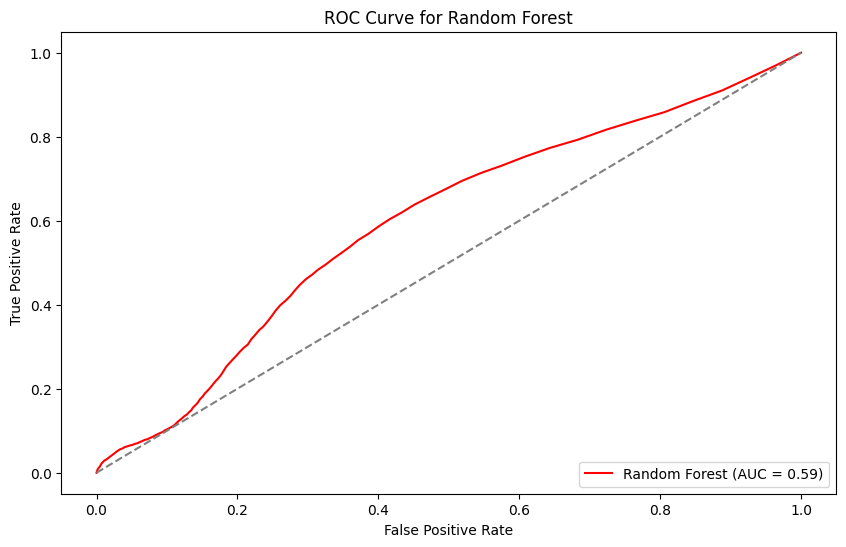

In [ ]:
# Cross-validated predictions for ROC curve and metrics
rf_predictions = cross_val_predict(rf_model, X, y, cv=10)
rf_probs = cross_val_predict(rf_model, X, y, cv=10, method='predict_proba')[:, 1]

rf_precision = precision_score(y, rf_predictions)
rf_recall = recall_score(y, rf_predictions)
rf_f1 = f1_score(y, rf_predictions)
rf_auc = roc_auc_score(y, rf_probs)

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y, rf_probs)

# Print the metrics
print("Random Forest Metrics:")
print(f"Precision: {rf_precision:.2f}, Recall: {rf_recall:.2f}, F-Score: {rf_f1:.2f}, AUC: {rf_auc:.2f}")

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, color='red', label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()

In [ ]:
P_A = 0.0001  #(P(A))
P_not_A = 1 - P_A  #(P(not A))
P_B_given_A = 0.99  #(P(B|A))
P_B_given_not_A = 0.01  #(P(B|not A))

#(P(B))
P_B = P_B_given_A * P_A + P_B_given_not_A * P_not_A

# Bayes' Theorem for P(A|B)
P_A_given_B = (P_B_given_A * P_A) / P_B
print(f"The probability that a customer flagged as high-value is actually a high-value prospect is about {P_A_given_B*100:.2f}%.")

The probability that a customer flagged as high-value is actually a high-value prospect is about 0.98%.
